In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 932.9/932.9 kB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 72.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 60.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 56.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [2]:
import numpy as np
import pandas as pd
import os
from PIL import Image
import cv2
import yaml
import matplotlib.pyplot as plt
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!unzip -oq "/content/drive/MyDrive/ConstructionSiteSafety_yolov8.zip"

# **Visualization**

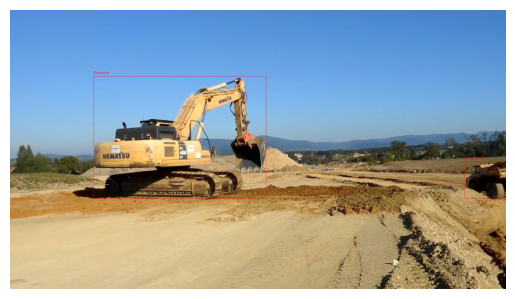

In [18]:
image_folder = "/content/train/images/"
label_folder = "/content/train/labels/"
data_yaml_path = "/content/data.yaml"

# Load class names from data.yml
with open(data_yaml_path, 'r') as file:
    data = yaml.safe_load(file)
class_names = data['names']

# Get list of images
image_files = [f for f in os.listdir(image_folder)]

# Choose the first image
image_file = image_files[20]
image_path = os.path.join(image_folder, image_file)

# Get corresponding label file
label_path = os.path.join(label_folder, image_file.replace('.jpg', '.txt'))

# Load image
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for Matplotlib
h, w, _ = img.shape

# Read YOLO annotations
if os.path.exists(label_path):
    with open(label_path, "r") as file:
        labels = file.readlines()

    for label in labels:
        data = label.strip().split()
        class_id = int(float(data[0]))  # First value is class ID
        class_name = class_names[class_id]  # Get class name from YAML

        x_center, y_center, box_width, box_height = map(float, data[1:])

        # Convert YOLO format to pixel values
        x1 = int((x_center - box_width / 2) * w)
        y1 = int((y_center - box_height / 2) * h)
        x2 = int((x_center + box_width / 2) * w)
        y2 = int((y_center + box_height / 2) * h)

        # Draw bounding box with class name
        cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 1)
        cv2.putText(img, class_name, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255, 0, 0), 1)

# Display image with bounding boxes
plt.imshow(img)
plt.axis("off")
plt.show()

# **Data Augmentation**

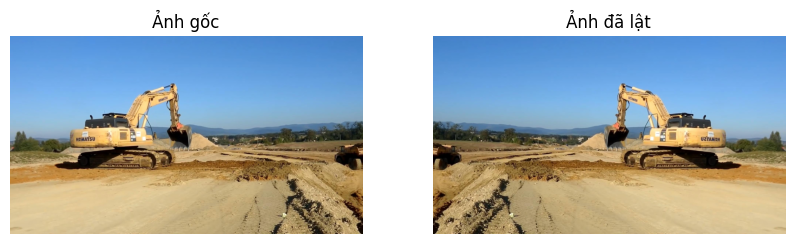

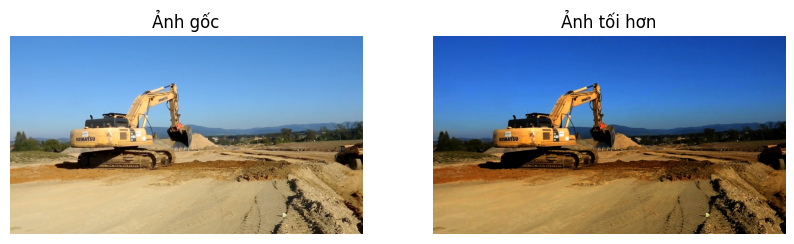

In [21]:
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
flipped_img = cv2.flip(img, 1)

gamma = 0.5
table = np.array([((i / 255.0) ** (1.0 / gamma)) * 255 for i in np.arange(0, 256)]).astype("uint8")
brighter_img = cv2.LUT(img, table)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img)
ax[0].set_title("Ảnh gốc")
ax[0].axis("off")

ax[1].imshow(flipped_img)
ax[1].set_title("Ảnh đã lật")
ax[1].axis("off")

plt.show()


fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img)
ax[0].set_title("Ảnh gốc")
ax[0].axis("off")

ax[1].imshow(brighter_img)
ax[1].set_title("Ảnh tối hơn")
ax[1].axis("off")

plt.show()

In [7]:
for image_file in image_files:
    image_path = os.path.join(image_folder, image_file)
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    flipped_img = cv2.flip(img, 1)
    flipped_path = os.path.join(image_folder, "flipped_" + image_file)
    cv2.imwrite(flipped_path, flipped_img)

    gamma = 0.5
    table = np.array([((i / 255.0) ** (1.0 / gamma)) * 255 for i in np.arange(0, 256)]).astype("uint8")
    brighter_img = cv2.LUT(img, table)
    brighter_path = os.path.join(image_folder, "darker_" + image_file)
    cv2.imwrite(brighter_path, brighter_img)

In [8]:
for text_file in os.listdir(label_folder):

    text_path = os.path.join(label_folder, text_file)
    with open(text_path, "r") as file:
        lines = file.readlines()

    flipped_lines = []
    for line in lines:
        data = line.strip().split()
        class_id ,x_center, y_center, box_width, box_height = map(float, data)

        new_x_center = 1 - x_center

        flipped_lines.append(f"{class_id} {new_x_center} {y_center} {box_width} {box_height}\n")

    brighter_label_path = os.path.join(label_folder, "brighter_" + text_file)
    with open(brighter_label_path, "w") as file:
        file.writelines(lines)
    file.close()

    flipped_label_path = os.path.join(label_folder, "flipped_" + text_file)
    with open(flipped_label_path, "w") as file:
        file.writelines(flipped_lines)
    file.close()


# **Train model**

In [9]:
model = YOLO("yolov8n.pt")

# Use the model
results = model.train(data=data_yaml_path,  batch=8, epochs=32)  # train the model

100%|██████████| 6.25M/6.25M [00:00<00:00, 113MB/s]


Ultralytics 8.3.88 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/data.yaml, epochs=32, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, li

100%|██████████| 755k/755k [00:00<00:00, 23.5MB/s]


Overriding model.yaml nc=80 with nc=25

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 101MB/s]


AMP: checks passed ✅


train: Scanning /content/train/labels... 1563 images, 102 backgrounds, 0 corrupt: 100%|██████████| 1563/1563 [00:00<00:00, 2417.93it/s]

train: New cache created: /content/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/valid/labels... 114 images, 10 backgrounds, 0 corrupt: 100%|██████████| 114/114 [00:00<00:00, 1064.98it/s]

val: New cache created: /content/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000345, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 32 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/32      1.39G      1.381      3.717      1.425         23        640: 100%|██████████| 196/196 [00:41<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.03it/s]

                   all        114        733      0.762      0.176      0.198      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/32      1.67G      1.379      2.437      1.408         60        640: 100%|██████████| 196/196 [00:40<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.92it/s]

                   all        114        733      0.655      0.274      0.305      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/32      1.67G      1.318      1.984      1.345         83        640: 100%|██████████| 196/196 [00:37<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.58it/s]


                   all        114        733      0.669      0.299      0.335      0.212

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/32      1.67G      1.266      1.816      1.336         18        640: 100%|██████████| 196/196 [00:38<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.35it/s]


                   all        114        733      0.755      0.307       0.38      0.243

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/32      1.67G      1.239      1.704      1.302        103        640: 100%|██████████| 196/196 [00:37<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.10it/s]

                   all        114        733      0.595      0.368      0.387       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/32      1.67G      1.203      1.616      1.268         73        640: 100%|██████████| 196/196 [00:38<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.86it/s]

                   all        114        733       0.51       0.44      0.449       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/32      1.67G      1.187       1.54      1.259         21        640: 100%|██████████| 196/196 [00:38<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.42it/s]

                   all        114        733       0.59      0.449      0.456      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/32      1.67G      1.158      1.461      1.247         26        640: 100%|██████████| 196/196 [00:40<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.14it/s]

                   all        114        733        0.7      0.427      0.481      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/32      1.67G      1.132      1.392      1.219         26        640: 100%|██████████| 196/196 [00:42<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.80it/s]

                   all        114        733       0.66      0.411      0.479      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/32      1.67G      1.118      1.351      1.217         72        640: 100%|██████████| 196/196 [00:46<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.07it/s]


                   all        114        733      0.707      0.417      0.493      0.346

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/32      1.67G      1.096      1.284      1.191         19        640: 100%|██████████| 196/196 [00:38<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.20it/s]


                   all        114        733      0.677      0.429      0.495      0.339

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/32      1.67G      1.082      1.254      1.178         34        640: 100%|██████████| 196/196 [00:39<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.85it/s]

                   all        114        733      0.647      0.465      0.496      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/32      1.82G      1.072       1.23      1.176         86        640: 100%|██████████| 196/196 [00:38<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.27it/s]

                   all        114        733      0.647      0.469      0.515      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/32      1.82G       1.05      1.174      1.164         71        640: 100%|██████████| 196/196 [00:39<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.95it/s]

                   all        114        733      0.657      0.475      0.558      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/32      1.82G      1.031       1.17      1.159         81        640: 100%|██████████| 196/196 [00:38<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.08it/s]

                   all        114        733       0.76      0.465      0.521      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/32      1.82G      1.019      1.132      1.154         76        640: 100%|██████████| 196/196 [00:36<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.23it/s]


                   all        114        733      0.687      0.485      0.536      0.353

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/32      1.82G     0.9941      1.102      1.132         29        640: 100%|██████████| 196/196 [00:36<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.94it/s]

                   all        114        733      0.695      0.482      0.546       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/32      1.82G     0.9789      1.062      1.124         59        640: 100%|██████████| 196/196 [00:38<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.01it/s]


                   all        114        733      0.781      0.459      0.549      0.372

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/32      1.97G     0.9713      1.035      1.116         45        640: 100%|██████████| 196/196 [00:38<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.47it/s]


                   all        114        733      0.812      0.445      0.562      0.379

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/32      1.97G     0.9583      1.032      1.109         29        640: 100%|██████████| 196/196 [00:38<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.76it/s]


                   all        114        733      0.728      0.488      0.556       0.38

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/32      1.97G     0.9502      1.016      1.104         67        640: 100%|██████████| 196/196 [00:38<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.56it/s]


                   all        114        733      0.786      0.457      0.558      0.373

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/32      1.97G     0.9452      1.013      1.107         23        640: 100%|██████████| 196/196 [00:37<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.85it/s]


                   all        114        733      0.772      0.476      0.548      0.375
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/32      1.97G     0.9493      1.082      1.094         11        640: 100%|██████████| 196/196 [00:38<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.61it/s]

                   all        114        733      0.701      0.455      0.531       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/32      1.97G     0.9018      0.976      1.062         18        640: 100%|██████████| 196/196 [00:37<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.52it/s]


                   all        114        733      0.762      0.467      0.554      0.376

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/32      1.97G      0.885      0.941      1.051         13        640: 100%|██████████| 196/196 [00:37<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.41it/s]

                   all        114        733      0.712      0.478      0.552      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/32      1.97G     0.8765     0.9293      1.043        121        640: 100%|██████████| 196/196 [00:35<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.23it/s]

                   all        114        733      0.737      0.464      0.564      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/32      1.97G     0.8615     0.8981      1.034         24        640: 100%|██████████| 196/196 [00:36<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.15it/s]


                   all        114        733      0.758      0.467      0.575      0.384

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/32      1.97G      0.848     0.8904      1.032         15        640: 100%|██████████| 196/196 [00:37<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.19it/s]

                   all        114        733      0.812      0.458      0.565      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/32      1.97G     0.8422     0.8696      1.016         25        640: 100%|██████████| 196/196 [00:36<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.13it/s]

                   all        114        733      0.723      0.469      0.573      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/32      1.97G     0.8385     0.8637      1.028         16        640: 100%|██████████| 196/196 [00:35<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.19it/s]

                   all        114        733      0.717      0.467      0.561      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/32      1.97G     0.8343     0.8553      1.016         21        640: 100%|██████████| 196/196 [00:37<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.67it/s]

                   all        114        733      0.724      0.477      0.576      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/32      1.97G     0.8226      0.844       1.01          9        640: 100%|██████████| 196/196 [00:37<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.74it/s]

                   all        114        733      0.798      0.468      0.576      0.387



32 epochs completed in 0.360 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.88 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,010,523 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.05it/s]


                   all        114        733      0.797      0.469      0.576      0.386
             Excavator         10         12      0.668      0.667       0.68      0.531
                Gloves         11         25      0.746      0.235      0.327      0.156
               Hardhat         42         79      0.912      0.525      0.711      0.498
                Ladder          8         10      0.591        0.7      0.637      0.469
                  Mask         19         21      0.962      0.762      0.838      0.545
            NO-Hardhat         37         69      0.763      0.464      0.521      0.295
               NO-Mask         44         74      0.846      0.338      0.466      0.169
        NO-Safety Vest         56        106       0.85      0.491      0.598      0.342
                Person         84        166      0.847      0.634      0.763       0.54
           Safety Cone         13         44      0.821       0.73      0.813      0.451
           Safety Ves

# **Prediction**

In [10]:
model = YOLO("/content/runs/detect/train/weights/best.pt")
folder_path = "/content/test/images"

In [11]:
results = model.predict(source=folder_path, save_txt=True, save_conf=True, save=True, conf = 0.25, iou=0.45)


image 1/82 /content/test/images/-4405-_png_jpg.rf.937688313347dbcd3b24201dd7882906.jpg: 640x640 1 dump truck, 7.4ms
image 2/82 /content/test/images/000005_jpg.rf.c613c066b79795d219855aca269760e6.jpg: 448x640 1 Hardhat, 3 NO-Hardhats, 1 NO-Mask, 4 Persons, 36.9ms
image 3/82 /content/test/images/002551_jpg.rf.b09484b130c1587abfa8365c3d774bf1.jpg: 448x640 1 Gloves, 2 Hardhats, 1 NO-Mask, 3 NO-Safety Vests, 3 Persons, 7.6ms
image 4/82 /content/test/images/003357_jpg.rf.9fb1f2cebc239b4276a81ce2cbf9e911.jpg: 480x640 3 Safety Cones, 1 wheel loader, 106.1ms
image 5/82 /content/test/images/004063_jpg.rf.6ecc587c20a87ec176841aea39b8f5db.jpg: 448x640 5 Hardhats, 4 NO-Safety Vests, 6 Persons, 1 Safety Vest, 42.7ms
image 6/82 /content/test/images/004763_jpg.rf.c8f1bd1cb7cf6037f7c90a6c213d6364.jpg: 384x640 3 Hardhats, 2 NO-Masks, 3 NO-Safety Vests, 3 Persons, 125.5ms
image 7/82 /content/test/images/006463_jpg.rf.f134bfc3f96f0e501a027414ffffcc82.jpg: 448x640 1 Gloves, 9 Hardhats, 1 Mask, 4 NO-Masks,

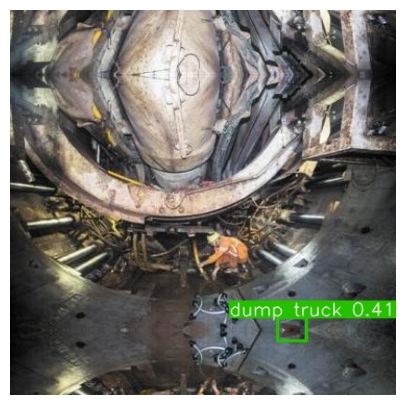

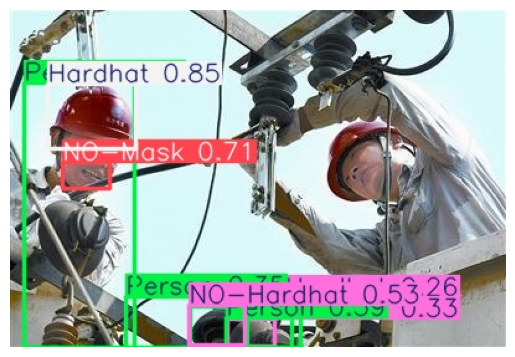

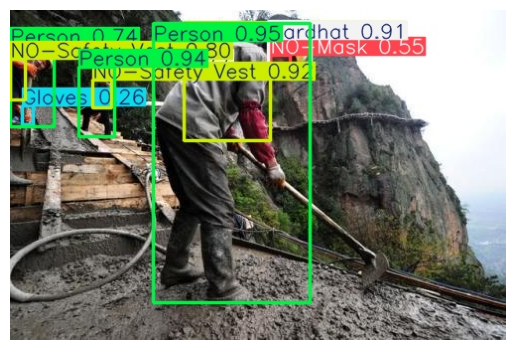

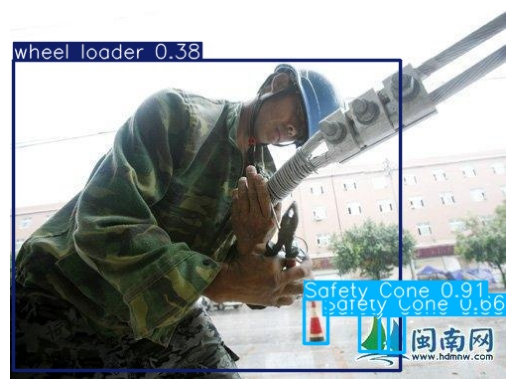

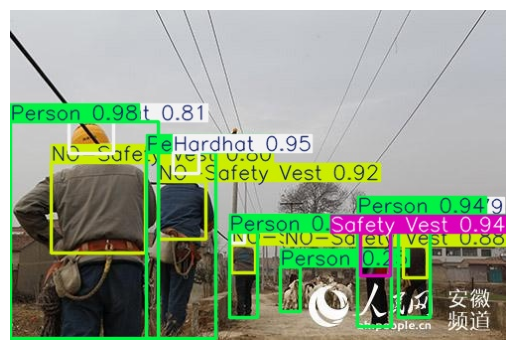

In [12]:
# Get list of image files
output_images_folder = "/content/runs/detect/predict"
image_files = sorted([f for f in os.listdir(output_images_folder) if f.lower().endswith( '.jpg')])

plt.figure(figsize=(10, 5))

for i in range(5):
    img_path = os.path.join(output_images_folder, image_files[i])
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct display

    plt.imshow(img)
    plt.axis("off")

    plt.show()

In [15]:
def read_yolo_label(label_path):
    with open(label_path, 'r') as f:
        lines = f.readlines()
    return [list(map(float, line.strip().split())) for line in lines]

def convert_yolo_to_bbox(yolo_box, img_size=640):

    x_center, y_center, width, height = yolo_box[1:5]
    x_min = (x_center - width/2) * img_size
    y_min = (y_center - height/2) * img_size
    x_max = (x_center + width/2) * img_size
    y_max = (y_center + height/2) * img_size
    return [x_min, y_min, x_max, y_max]

def calculate_iou(box1, box2):

    x1_min, y1_min, x1_max, y1_max = box1
    x2_min, y2_min, x2_max, y2_max = box2

    inter_x_min = max(x1_min, x2_min)
    inter_y_min = max(y1_min, y2_min)
    inter_x_max = min(x1_max, x2_max)
    inter_y_max = min(y1_max, y2_max)

    inter_area = max(0, inter_x_max - inter_x_min) * max(0, inter_y_max - inter_y_min)

    area1 = (x1_max - x1_min) * (y1_max - y1_min)
    area2 = (x2_max - x2_min) * (y2_max - y2_min)

    union_area = area1 + area2 - inter_area

    return inter_area / union_area if union_area != 0 else 0

def evaluate_predictions(labels_dir, predictions_dir, iou_threshold=0.5):

    results = {
        'true_positives': 0,
        'false_positives': 0,
        'false_negatives': 0,
        'total_gt': 0,
        'total_pred': 0,
        'iou_scores': []
    }

    for label_file in os.listdir(labels_dir):
        if label_file.endswith('.txt'):
            label_path = os.path.join(labels_dir, label_file)
            pred_path = os.path.join(predictions_dir, label_file)

            gt_boxes = read_yolo_label(label_path)
            pred_boxes = read_yolo_label(pred_path) if os.path.exists(pred_path) else []

            results['total_gt'] += len(gt_boxes)
            results['total_pred'] += len(pred_boxes)

            matched_gt = set()
            matched_pred = set()

            for i, gt in enumerate(gt_boxes):
                gt_box = convert_yolo_to_bbox(gt)
                for j, pred in enumerate(pred_boxes):
                    pred_box = convert_yolo_to_bbox(pred)
                    iou = calculate_iou(gt_box, pred_box)

                    if iou >= iou_threshold and gt[0] == pred[0]:
                        if j not in matched_pred:
                            results['true_positives'] += 1
                            matched_gt.add(i)
                            matched_pred.add(j)
                            results['iou_scores'].append(iou)
                            break

            results['false_positives'] += len(pred_boxes) - len(matched_pred)
            results['false_negatives'] += len(gt_boxes) - len(matched_gt)

    precision = results['true_positives'] / (results['true_positives'] + results['false_positives'] + 1e-9)
    recall = results['true_positives'] / (results['true_positives'] + results['false_negatives'] + 1e-9)
    f1_score = 2 * (precision * recall) / (precision + recall + 1e-9)
    avg_iou = np.mean(results['iou_scores']) if results['iou_scores'] else 0

    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1_score:.4f}")
    print(f"Average IoU: {avg_iou:.4f}")
    print(f"Total Ground Truth: {results['total_gt']}")
    print(f"Total Predictions: {results['total_pred']}")

labels_dir = "/content/test/labels"
predictions_dir = "/content/runs/detect/predict/labels"

evaluate_predictions(labels_dir, predictions_dir)

Precision: 0.7664
Recall: 0.5372
F1 Score: 0.6317
Average IoU: 0.8242
Total Ground Truth: 806
Total Predictions: 565
